<h2 align="center">Codebasics DL Course: CIFAR10 Classification</h2>

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import numpy as np

In [15]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Data Load

In [16]:
# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# CIFAR-10 dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [17]:
len(train_dataset), len(test_dataset)

(50000, 10000)

In [18]:
batch_size = 100

# Data loaders
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Visualize a Few Images

In [31]:
for i, (images, labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    break

torch.Size([100, 3, 32, 32])
torch.Size([100])


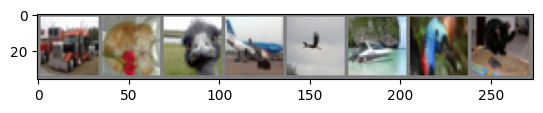

In [39]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# show images
imshow(torchvision.utils.make_grid(images[:8]))

In [40]:
labels[:8]

tensor([9, 3, 2, 0, 2, 8, 2, 3])

In [30]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [41]:
[classes[i] for i in labels[:8]]

['truck', 'cat', 'bird', 'plane', 'bird', 'ship', 'bird', 'cat']

### Train a Neural Network

In [67]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=(3,3), padding='same'),  # Output: (32, 32, 32)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2)),        # Output: (32, 16, 16)
            
            nn.Conv2d(32, 64, kernel_size=(3,3)),             # Output: (64, 14, 14)
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))         # Output: (64, 7, 7)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),                                # Flatten to (64 * 7 * 7 = 3136)
            nn.Linear(64 * 7 * 7, 600),                  # Corrected input size
            nn.ReLU(),
            nn.Linear(600, 120),
            nn.ReLU(),
            nn.Linear(120, 10)
        )
        
    def forward(self, x):
        x = self.network(x)
        x = self.fc_layers(x)
        return x

In [68]:
model = CNN()
dummy_input = torch.randn(1, 3, 32, 32)  # Single example with CIFAR-10 dimensions
output = model(dummy_input)
print("Output shape:", output.shape)  # Should be [1, 10]

Output shape: torch.Size([1, 10])


In [69]:
# Hyperparameters
num_epochs = 10
learning_rate = 0.001

model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [70]:
# Training loop
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}")

# Testing the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%")

Epoch [1/10], Step [100/500], Loss: 1.4199
Epoch [1/10], Step [200/500], Loss: 1.3329
Epoch [1/10], Step [300/500], Loss: 1.2921
Epoch [1/10], Step [400/500], Loss: 0.9807
Epoch [1/10], Step [500/500], Loss: 0.9466
Epoch [2/10], Step [100/500], Loss: 0.8272
Epoch [2/10], Step [200/500], Loss: 0.9533
Epoch [2/10], Step [300/500], Loss: 0.8525
Epoch [2/10], Step [400/500], Loss: 0.9618
Epoch [2/10], Step [500/500], Loss: 0.7772
Epoch [3/10], Step [100/500], Loss: 0.8931
Epoch [3/10], Step [200/500], Loss: 0.7770
Epoch [3/10], Step [300/500], Loss: 0.7750
Epoch [3/10], Step [400/500], Loss: 0.8485
Epoch [3/10], Step [500/500], Loss: 0.9287
Epoch [4/10], Step [100/500], Loss: 0.6121
Epoch [4/10], Step [200/500], Loss: 0.5978
Epoch [4/10], Step [300/500], Loss: 0.7204
Epoch [4/10], Step [400/500], Loss: 0.5381
Epoch [4/10], Step [500/500], Loss: 0.7186
Epoch [5/10], Step [100/500], Loss: 0.7625
Epoch [5/10], Step [200/500], Loss: 0.4723
Epoch [5/10], Step [300/500], Loss: 0.4880
Epoch [5/10